### Pair call + Rescue를 기반으로 한 Venn Diagram

220930 : {'Tumor': 1, 'Dura': 3}


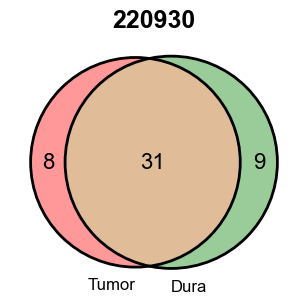

221026 : {'Tumor': 1, 'Dura': 3}


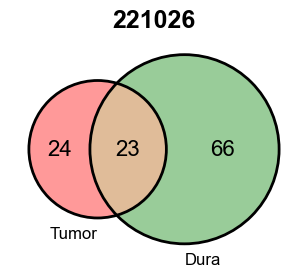

221102 : {'Tumor': 1, 'Dura': 3}


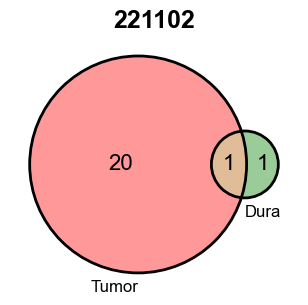

221202 : {'Tumor': 1, 'Dura': 3}


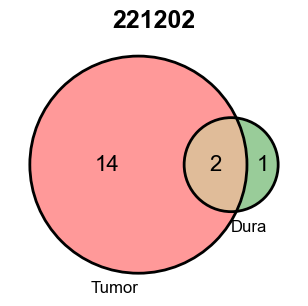

230127 : {'Tumor': 1, 'Dura': 3, 'Cortex': 5}
[Text(-0.16416559800275007, -1.4453225252450978e-17, '30'), Text(-0.6879878455799433, -1.562499307941056e-17, '4'), Text(-0.486711499894509, 2.794961470379772e-17, '3'), Text(0.5680477074383672, 0.0, '15'), Text(0.24528751074546545, 1.9763362088606608e-17, '3'), None, None]


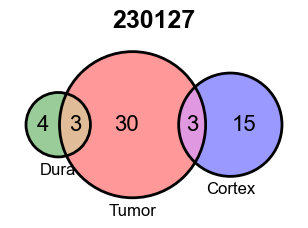

230323_2 : {'Tumor': 1, 'Dura': 3}


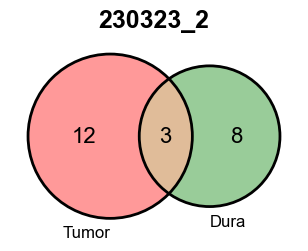

230405_2 : {'Tumor': 1, 'Dura': 3}


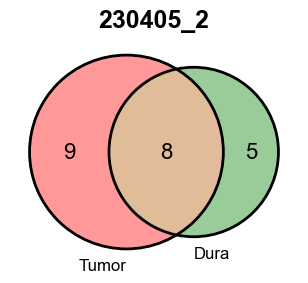

230419 : {'Tumor': 1, 'Dura': 7, 'Ventricle': 5, 'Cortex': 3}


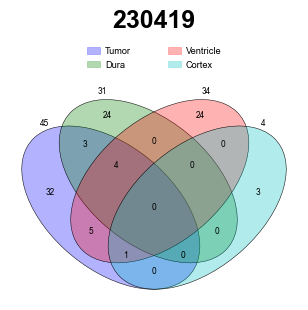

230526 : {'Tumor': 1, 'Dura': 3}


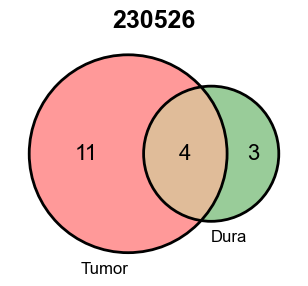

230822 : {'Tumor': 1, 'Dura': 3}


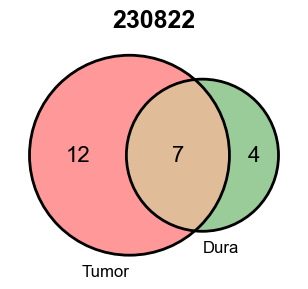

230920 : {'Tumor': 1, 'Dura': 3}


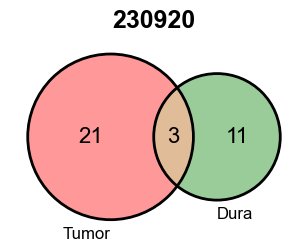

In [4]:
import vcf
import sys
import os.path
import argparse
import matplotlib.pyplot as plt
from venny4py.venny4py import *
from matplotlib_venn import venn3, venn3_circles, venn2, venn2_circles
plt.rcParams["font.family"] = 'arial'
plt.style.use ('ggplot')

DIR = "/data/project/Meningioma/04.mutect/07.2D_merged/02.BCFTOOLS_MERGE_VCF"

MIN_BLOCK_SHARED = 1


def visualization_venn4 (Set_A, Set_B, Set_C, Set_D, date, label_list, OUTPUT_DIR):

    if not os.path.exists (  "/".join( OUTPUT_DIR.split("/")[:-1]  ) ):
        os.makedirs ( "/".join( OUTPUT_DIR.split("/")[:-1]  )  )

    fig, ax = plt.subplots( figsize = ( 3, 3 ) )
    fig.subplots_adjust ( bottom = 0.02, top = 0.9, left = 0.02, right = 0.98)
    ax.set_title (date, {'fontsize': 18, 'fontweight' : 'bold'})

    sets = {
    label_list[0]: Set_A,
    label_list[1]: Set_B,
    label_list[2]: Set_C,
    label_list[3]: Set_D
    }

    venny4py(sets = sets, size =3, dpi=300, out = OUTPUT_DIR, ext='jpg', asax = ax)

    plt.savefig ( OUTPUT_DIR )
    plt.show()

def visualization_venn3 (Set_A, Set_B, Set_C, date, label_list, OUTPUT_DIR):

    if not os.path.exists (  "/".join( OUTPUT_DIR.split("/")[:-1]  ) ):
        os.makedirs ( "/".join( OUTPUT_DIR.split("/")[:-1]  )  )

    fig, ax = plt.subplots( figsize = ( 3, 3 ) )
    fig.subplots_adjust ( bottom = 0.02, top = 0.9, left = 0.02, right = 0.98)
    ax.set_title (date, {'fontsize': 18, 'fontweight' : 'bold'})

    venn = venn3([Set_A, Set_B, Set_C], set_labels=( label_list[0], label_list[1], label_list[2]))
    circles = venn3_circles([Set_A, Set_B, Set_C])

    # Customize the Venn diagram if needed
    #venn.get_label_by_id('111').set_text( '{}'.format("\n".join( Set_A & Set_B & Set_C) ))

    for text in venn.subset_labels:
        if text != None:
            text.set_fontsize(16)

    plt.savefig ( OUTPUT_DIR )
    plt.show()
                

def visualization_venn2 (Set_A, Set_B, date, label_list, OUTPUT_DIR):

    if not os.path.exists (  "/".join( OUTPUT_DIR.split("/")[:-1]  ) ):
        os.makedirs ( "/".join( OUTPUT_DIR.split("/")[:-1]  )  )

    fig, ax = plt.subplots( figsize = (3, 3 ) )
    fig.subplots_adjust ( bottom = 0.02, top = 0.9, left = 0.02, right = 0.98)
    ax.set_title (date, {'fontsize': 18, 'fontweight' : 'bold'})

    venn = venn2([Set_A, Set_B], set_labels=( label_list[0], label_list[1] ))
    circles = venn2_circles([Set_A, Set_B ])

    # Customize the Venn diagram if needed
    #venn.get_label_by_id('11').set_text( '{}'.format("\n".join( Set_A & Set_B) ))

    for text in venn.subset_labels:
        if text != None:
            text.set_fontsize(16)

    plt.savefig ( OUTPUT_DIR )
    plt.show()




for date in [ "220930", "221026", "221102", "221202", "230127", "230323_2", "230405_2", "230419", "230526", "230822", "230920" ]:
    INPUT_VCF =  DIR + "/" + date + ".BCFTOOLS_MERGE.vcf"
    vcf_reader = vcf.Reader(open( INPUT_VCF, "r")  )

    cnt_TISSUE, TISSUE_index = 0, {}
    for TISSUE in ["Tumor", "Dura", "Ventricle", "Cortex"]:
        for i in range ( len (vcf_reader.samples) ) :
            if TISSUE in vcf_reader.samples[i]:
                cnt_TISSUE += 1
                TISSUE_index[TISSUE] = i
    
    print ( "{} : {}".format(date , TISSUE_index) )


    if cnt_TISSUE == 4:
        Set_A, Set_B, Set_C, Set_D = set(), set(), set (), set ()
        for record in vcf_reader:        # record.CHROM, recrod.POS ,record.ALT
            for TISSUE, sampleindex in TISSUE_index.items():
                #Gene_Symbol = Retrieve_Gene_Symbol (record)
                if record.samples [sampleindex].data.GT != "./.":
                    if TISSUE == "Tumor":
                        Set_A.add ( record.CHROM + ":" + str(record.POS) )
                    elif TISSUE == "Dura":
                        Set_B.add ( record.CHROM + ":" + str(record.POS)  )
                    elif TISSUE == "Ventricle":
                        Set_C.add ( record.CHROM + ":" + str(record.POS)  )
                    elif TISSUE == "Cortex":
                        Set_D.add ( record.CHROM + ":" + str(record.POS)  )

        visualization_venn4 (Set_A, Set_B, Set_C, Set_D, date, list(TISSUE_index.keys()), "/data/project/Meningioma/script/04.Shared_calls/Venn/" + date )

            
    if cnt_TISSUE == 3:
        Set_A, Set_B, Set_C = set(), set(), set ()
        for record in vcf_reader:        # record.CHROM, recrod.POS ,record.ALT
            for TISSUE, sampleindex in TISSUE_index.items():
                #Gene_Symbol = Retrieve_Gene_Symbol (record)
                if record.samples [sampleindex].data.GT != "./.":
                    if TISSUE == "Tumor":
                        Set_A.add ( record.CHROM + ":" + str(record.POS) )
                    elif TISSUE == "Dura":
                        Set_B.add ( record.CHROM + ":" + str(record.POS)  )
                    else:
                        Set_C.add ( record.CHROM + ":" + str(record.POS)  )

        visualization_venn3 (Set_A, Set_B, Set_C, date, list(TISSUE_index.keys()), "/data/project/Meningioma/script/04.Shared_calls/Venn/" + date + ".jpg")


    if cnt_TISSUE == 2:
        Set_A, Set_B = set(), set()
        for record in vcf_reader:        # record.CHROM, recrod.POS ,record.ALT
            for TISSUE, sampleindex in TISSUE_index.items():
                #Gene_Symbol = Retrieve_Gene_Symbol (record)
                if record.samples [sampleindex].data.GT != "./.":
                    if TISSUE == "Tumor":
                        Set_A.add ( record.CHROM + ":" + str(record.POS) )
                    elif TISSUE == "Dura":
                        Set_B.add ( record.CHROM + ":" + str(record.POS)  )
                    
        visualization_venn2 (Set_A, Set_B, date, list(TISSUE_index.keys()), "/data/project/Meningioma/script/04.Shared_calls/Venn/" + date + ".jpg")
                

        

### Multiple mutect call을 기반으로 한 Venn Diagram

Matplotlib is building the font cache; this may take a moment.


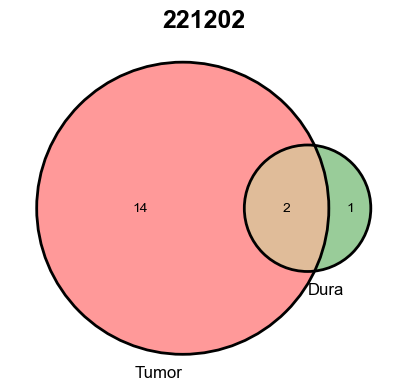

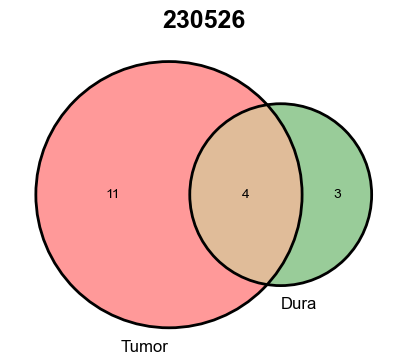

In [1]:
import vcf
import sys
import os.path
import argparse
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles, venn2, venn2_circles
plt.rcParams["font.family"] = 'arial'
plt.style.use ('ggplot')

DIR = "/data/project/Meningioma/04.mutect/04.rescue"

MIN_BLOCK_SHARED = 1


def Retrieve_Gene_Symbol (record):
    try:
        Gene_Symbol = (record.INFO["CSQ"][0].split("|")[3])       # 일단 맨 상위 script만 보자
        if record.INFO["CSQ"][0].split("|")[1] == "intergenic_variant":
            Gene_Symbol = "intergenic_variant"
        elif record.INFO["CSQ"][0].split("|")[1] == "regulatory_region_variant":
            Gene_Symbol = "regulatory_region_variant"
    except:
        Gene_Symbol = ""

    return Gene_Symbol



def visualization_venn3 (Set_A, Set_B, Set_C, date, label_list, OUTPUT_DIR):

    if not os.path.exists (  "/".join( OUTPUT_DIR.split("/")[:-1]  ) ):
        os.makedirs ( "/".join( OUTPUT_DIR.split("/")[:-1]  )  )

    fig, ax = plt.subplots( figsize = (5, 5 ) )
    ax.set_title (date, {'fontsize': 18, 'fontweight' : 'bold'})

    venn = venn3([Set_A, Set_B, Set_C], set_labels=( label_list[0], label_list[1], label_list[2]))
    circles = venn3_circles([Set_A, Set_B, Set_C])

    # Customize the Venn diagram if needed
    venn.get_label_by_id('111').set_text( '{}'.format("\n".join( Set_A & Set_B & Set_C) ))

    for text in venn.subset_labels:
        text.set_fontsize(10)

    plt.savefig ( OUTPUT_DIR )
    plt.show()
                

def visualization_venn2 (Set_A, Set_B, date, label_list, OUTPUT_DIR):

    if not os.path.exists (  "/".join( OUTPUT_DIR.split("/")[:-1]  ) ):
        os.makedirs ( "/".join( OUTPUT_DIR.split("/")[:-1]  )  )

    fig, ax = plt.subplots( figsize = (5, 5 ) )
    ax.set_title (date, {'fontsize': 18, 'fontweight' : 'bold'})

    venn = venn2([Set_A, Set_B], set_labels=( label_list[0], label_list[1] ))
    circles = venn2_circles([Set_A, Set_B ])

    # Customize the Venn diagram if needed
    #venn.get_label_by_id('11').set_text( '{}'.format("\n".join( Set_A & Set_B) ))

    for text in venn.subset_labels:
        text.set_fontsize(10)

    plt.savefig ( OUTPUT_DIR )
    plt.show()



# for date in ["220930", "221026", "221102", "230127", "230323", "230405", "230419"]:
# for date in ["220930", "221026", "221102", "230127", "230323", "230419"]:
for date in ["221202", "230526"]:
    cnt_TISSUE = 0
    for TISSUE in ["Tumor", "Dura", "Ventricle", "Cortex"]:
        INPUT_VCF = DIR + "/" + date + "_" + TISSUE + ".MT2.FMC.HF.RMBLACK.vep.rescue.vcf"
        if os.path.exists ( INPUT_VCF ) == True:  # File이 있어야 실행
            cnt_TISSUE = cnt_TISSUE + 1
            
    if cnt_TISSUE == 3:
        # Define the sets A, B, and C
        Set_A = set()
        Set_B = set()
        Set_C = set()

        for TISSUE in ["Tumor", "Dura", "Ventricle", "Cortex"]:
            INPUT_VCF = DIR + "/" + date + "_" + TISSUE + ".MT2.FMC.HF.RMBLACK.vep.rescue.vcf"
            
            if os.path.exists ( INPUT_VCF ) == True:  # File이 있어야 실행
                vcf_reader = vcf.Reader(open(INPUT_VCF, "r"))
                samplenames = vcf_reader.samples        # ['220930_Blood', '220930_Dura', '220930_Tumor']

                variant_num = 0
                for record in vcf_reader:        # record.CHROM, recrod.POS ,record.ALT
                    Gene_Symbol = Retrieve_Gene_Symbol (record)

                    if TISSUE == "Tumor":
                        Set_A.add ( Gene_Symbol )
                    elif TISSUE == "Dura":
                        Set_B.add ( Gene_Symbol  )
                    elif (TISSUE == "Ventricle") | (TISSUE == "Cortex"):
                        Set_C.add ( Gene_Symbol  )
                    variant_num = variant_num + 1
    
        if os.path.exists ( DIR + "/" + date + "_Ventricle.MT2.FMC.HF.RMBLACK.vep.rescue.vcf" ) == True:
            visualization_venn3 (Set_A, Set_B, Set_C, date, ["Tumor", "Dura", "Ventricle"], "/data/project/Meningioma/script/04.Shared_calls/Venn/" + date + ".jpg")
        if os.path.exists ( DIR + "/" + date + "_Cortex.MT2.FMC.HF.RMBLACK.vep.rescue.vcf" ) == True:
            visualization_venn3 (Set_A, Set_B, Set_C, date, ["Tumor", "Dura", "Cortex"], "/data/project/Meningioma/script/04.Shared_calls/Venn/" + date + ".jpg")



    elif cnt_TISSUE == 2:
        Set_A, Set_B = set(), set()


        for TISSUE in ["Tumor", "Dura"]:
            INPUT_VCF = DIR + "/" + date + "_" + TISSUE + ".MT2.FMC.HF.RMBLACK.vep.rescue.vcf"            
            if os.path.exists ( INPUT_VCF ) == True:  # File이 있어야 실행
                vcf_reader = vcf.Reader(open(INPUT_VCF, "r"))

                variant_num = 0
                for record in vcf_reader:        # record.CHROM, recrod.POS ,record.ALT
                    Gene_Symbol = Retrieve_Gene_Symbol (record)

                    if TISSUE == "Tumor":
                        Set_A.add ( Gene_Symbol )
                    elif TISSUE == "Dura":
                        Set_B.add ( Gene_Symbol  )
                    variant_num = variant_num + 1

        visualization_venn2 (Set_A, Set_B, date, ["Tumor", "Dura"], "/data/project/Meningioma/script/04.Shared_calls/Venn/" + date + ".jpg")
                

        

### Multiple Mutect에서 shared call 구하기

In [1]:
import vcf
import sys
import os.path
import argparse

DIR = "/data/project/Meningioma/04.mutect/03.vep"

MIN_BLOCK_SHARED = 1
print ("MIN_BLOCK_SHARED = {}".format(MIN_BLOCK_SHARED))

#for INPUT_VCF in [ DIR + "/220930_12.MT2.FMC.HF.RMBLACK.vep.vcf", DIR + "/221026_12.MT2.FMC.HF.RMBLACK.vep.vcf", DIR + "/221102_12.MT2.FMC.HF.RMBLACK.vep.vcf", DIR + "/230127_12.MT2.FMC.HF.RMBLACK.vep.vcf", DIR + "/230323_12.MT2.FMC.HF.RMBLACK.vep.vcf", DIR + "/230405_12.MT2.FMC.HF.RMBLACK.vep.vcf", DIR + "/230419_12.MT2.FMC.HF.RMBLACK.vep.vcf"]:
for INPUT_VCF in [ DIR + "/230405_12.MT2.FMC.HF.RMBLACK.vep.vcf" ]:
    print ("\n\n" + INPUT_VCF)
    vcf_reader = vcf.Reader(open(INPUT_VCF, "r"))
    samplenames = vcf_reader.samples        # ['220930_Blood', '220930_Dura', '220930_Tumor']

    Venn_data = {}
    first_line = ["CHR:POS", "Gene", "Ref", "Alt", "Variant_Classification"]
    for sampleindex, samplename in enumerate(vcf_reader.samples):
        Venn_data[samplename] = []
        if "Blood" not in samplename:
            first_line.append (samplename)          # ['CHR', 'POS', '220930_Dura', '220930_Tumor']


    print (*first_line, sep = "\t")

    variant_count_total = 0

    for record in vcf_reader:        # record.CHROM, recrod.POS ,record.ALT
        if record.CHROM == "chrM":
            break
        # variant가 몇 sample에서 나오는지 찾기
        count = 0
        for sampleindex, samplename in enumerate(samplenames):    # ['220930_Dura', '220930_Tumor']
            
            if "Blood" not in samplename:
                if record.samples[sampleindex]["GT"] not in ["./.", "0/0", "0|0"] :   # Genotype 조건 만족
                    if None not in record.samples[sampleindex]["AD"]:      # 왜인지는 모르겠으나 [25, 5, None] 같은 경우도 있다
                        if record.samples[sampleindex]["AD"][-1] != 0:
                            #print (record.CHROM, record.POS, samplename, record.samples[sampleindex]["GT"], record.samples[sampleindex]["AD"])
                            count = count  + 1


        if count >= MIN_BLOCK_SHARED:
            try:
                Gene_Symbol = (record.INFO["CSQ"][0].split("|")[3])       # 일단 맨 상위 script만 보자
                if record.INFO["CSQ"][0].split("|")[1] == "intergenic_variant":
                    Gene_Symbol = "intergenic_variant"
                elif record.INFO["CSQ"][0].split("|")[1] == "regulatory_region_variant":
                    Gene_Symbol = "regulatory_region_variant"
            except:
                Gene_Symbol = ""
                
            line = [str(record.CHROM) + ":" + str(record.POS), str(Gene_Symbol), str(record.REF), str(record.ALT)[1:-1], record.INFO["CSQ"][0].split("|")[1] ]
            
            check = 0
            for sampleindex, samplename in enumerate(samplenames):
                if "Blood" not in samplename:
                    line.append('.'.join([str(a) for a in record.samples[sampleindex]["AD"]]))       # "REF.ALT"
                    if (0 in record.samples[sampleindex]["AD"]) | (  int ( record.samples[sampleindex]["AD"][1] )  < 2):
                        check = 1
        
            
            if check == 0:
                print ("\t".join(line))
                variant_count_total = variant_count_total + 1


    print ("총 Variant = {}개".format(variant_count_total))



MIN_BLOCK_SHARED = 1


/data/project/Meningioma/04.mutect/03.vep/230405_12.MT2.FMC.HF.RMBLACK.vep.vcf
CHR:POS	Gene	Ref	Alt	Variant_Classification	230405_Dura	230405_Tumor
chr1:151817137	RORC	C	T	intron_variant	73.3	31.4
chr2:69130158	ANTXR1	C	T	intron_variant	289.2	123.4
chr2:96341881	NCAPH	T	C	missense_variant	211.2	125.3
chr2:237372266	COL6A3	C	T	missense_variant	303.2	94.58
chr3:37323742	GOLGA4	T	G	missense_variant	334.2	90.42
chr7:987318	CYP2W1	C	G	intron_variant	272.4	135.65
chr7:150720500	GIMAP1	G	A	missense_variant	348.3	130.66
chr9:107487067	KLF4	T	G	missense_variant	248.4	94.47
chr12:57758684	CYP27B1	A	G	downstream_gene_variant	337.5	169.2
chr14:67766267	ZFYVE26	C	T	missense_variant	257.2	105.3
chr15:56096116	RFX7	T	C	missense_variant	301.3	95.53
chr16:31117845	KAT8	T	G	missense_variant	354.15	200.2
chr17:63972834	SCN4A	C	G	missense_variant	412.2	131.88
총 Variant = 13개


In [26]:
def Retrieve_Gene_Symbol (record):
    try:
        Gene_Symbol = (record.INFO["CSQ"][0].split("|")[3])       # 일단 맨 상위 script만 보자
        if record.INFO["CSQ"][0].split("|")[1] == "intergenic_variant":
            Gene_Symbol = "intergenic_variant"
        elif record.INFO["CSQ"][0].split("|")[1] == "regulatory_region_variant":
            Gene_Symbol = "regulatory_region_variant"
    except:
        Gene_Symbol = ""

    return Gene_Symbol


def Print_TSV (INPUT_VCF, OUTPUT_TSV):
    output_file = open ( OUTPUT_TSV , "w")
    if not os.path.exists ( OUTPUT_TSV ):
        os.makedirs ( OUTPUT_TSV )

    vcf_reader = vcf.Reader(open(INPUT_VCF, "r"))


    samplenames = vcf_reader.samples 
    row_header = ["Pos", "Gene"] + samplenames
    print ( "\t".join(row_header), sep = "\t", file = output_file )   # Header  출력

    for record in vcf_reader:        # record.CHROM, recrod.POS ,record.ALT
        if record.CHROM == "chrM":
            break
            
        row = [ str(record.CHROM) + ":" + str(record.POS),  Retrieve_Gene_Symbol (record)]
        #print ( "\t".join ( [str(record.CHROM) + ":" + str(record.POS)]) , file = output_common_file )   # Header  출력

        for i, samplename in enumerate (samplenames):
            #print ( record.samples [i].data.AD, end = "\t" )
            row.append ( str(record.samples [i].data.AD[1]) + "/" + str (record.samples [i].data.DP) )
            
        print ( "\t".join(row), file = output_file )

    output_file.close()


if __name__ == "__main__":
    import vcf
    import sys
    import os.path
    import matplotlib.pyplot as plt
    from matplotlib_venn import venn3, venn3_circles, venn2, venn2_circles
    plt.rcParams["font.family"] = 'arial'
    plt.style.use ('ggplot')

    DATE = "230405"

    JOINT_DIR = "/data/project/Meningioma/04.mutect/03.vep"
    Print_TSV ( INPUT_VCF = JOINT_DIR + "/" + DATE + "_12.MT2.FMC.HF.RMBLACK.vep.vcf", 
                                OUTPUT_TSV = "/data/project/Meningioma/script/04.Shared_calls/Calls/" + DATE + ".common.tsv" )
    

    UNIQUE_DIR = "/data/project/Meningioma/04.mutect/05.unique"
    Print_TSV ( INPUT_VCF = UNIQUE_DIR + "/" + DATE + "_Tumor.MT2.FMC.HF.RMBLACK.vep.rescue.unique.vcf", 
                        OUTPUT_TSV = "/data/project/Meningioma/script/04.Shared_calls/Calls/" + DATE + ".tumorprivate.tsv" )


